In [2]:
import audio_classifier_visualizer as acv
raven_file_helper = acv.RavenFileHelper()
audio_file_processor = acv.AudioFileProcessor()
audio_file_visualizer = acv.AudioFileVisualizer()


torch.Size([3246568, 2])
4000
  visualizations saved to /tmp/1.png at 1.5210206508636475


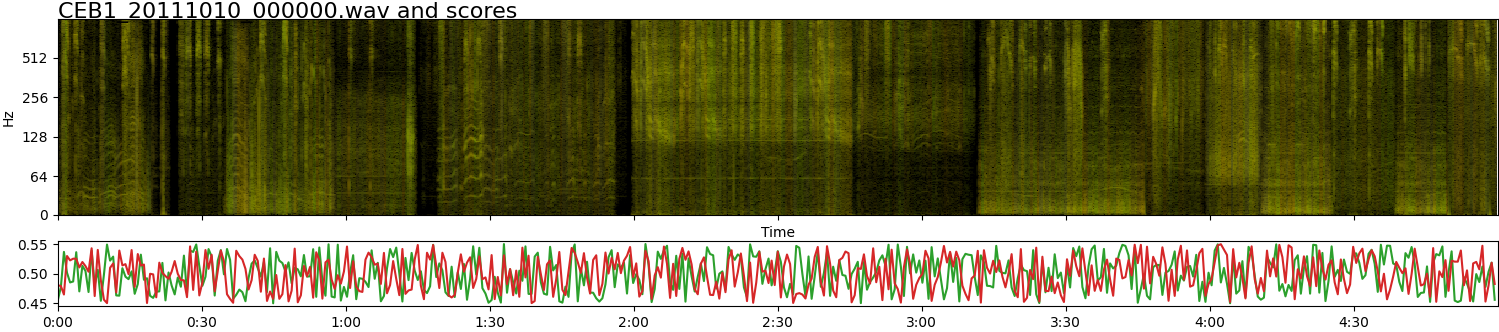

In [9]:
import torch
audio_file = 'CEB1_20111010_000000.wav'
start_time = 0
duration = 60 * 60
AVES_SR = 4000
audio_path = '/tmp/test.wav'

sr = AVES_SR
# y = raven_file_helper.get_downsampled_tensor(audio_file,start_time,duration+start_time,new_sr=AVES_SR)


y = raven_file_helper.load_entire_wav_file(audio_path, new_sr = AVES_SR)
print(y.shape)
print(sr)
y = y.flatten().to(torch.float16)[0:10000]
audio_file_visualizer.visualize_audio_file_fragment(
    f"{audio_file} and scores",
    '/tmp/1.png',
    audio_path,
    torch.rand(y.shape[0]) * 0.1 + 0.45,
    torch.rand(y.shape[0]) * 0.1 + 0.45,
    audio_file_processor,
    start_time=0,
    end_time=60*5,
    colormap='raw',
    width=16,
    height=3.5
)
from PIL import Image
import IPython.display as ipd
ipd.display(Image.open('/tmp/1.png'))


In [1]:
# Create some test labels
test_labels = [
    acv.RavenLabel(
        bt=10.0,  # begin time 
        et=15.0,  # end time
        lf=100,   # low frequency
        hf=500,   # high frequency
        duration=5.0,
        audio_file=audio_path,
        t1="test1",
        t2=None,
        t3=None, 
        notes="Test annotation 1",
        score=0.9,
        ravenfile=None
    ),
    acv.RavenLabel(
        bt=30.0,
        et=40.0, 
        lf=200,
        hf=800,
        duration=10.0,
        audio_file=audio_path,
        t1="test2", 
        t2=None,
        t3=None,
        notes="Test annotation 2",
        score=0.8,
        ravenfile=None
    )
]

# Visualize with the test labels
audio_file_visualizer.visualize_audio_file_fragment(
    f"{audio_file} with annotations",
    '/tmp/2.png',
    audio_path,
    torch.rand(y.shape[0]) * 0.1 + 0.45,
    torch.rand(y.shape[0]) * 0.1 + 0.45,
    audio_file_processor,
    start_time=0,
    end_time=60*5,
    colormap='raw',
    width=16,
    height=3.5,
    labels=test_labels
)

# Display the result
from PIL import Image
import IPython.display as ipd
ipd.display(Image.open('/tmp/2.png'))

NameError: name 'y' is not defined